In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\samsung\\Downloads\\AI-class-main\\AI-class-main/titanic.csv")
# C:/USers/GC/ : 파일이 저장된 디렉토리 위치, 각자에 맞게 수정

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#결측치 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

# Null 처리
#결측치가 있는 행을 동일한 값으로 채운다.

df.fillna(0, inplace=True)

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
# Survived를 타겟 레이블로 삼아서 EDA 수행
# 1. Plass 레이블별 갯수 및 차트표시
# 2. 생존자와 사망자 총 숫자 및 차트표시
# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석
# 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN) 숳ㅇ

In [9]:
# 1. Plass 레이블별 갯수 및 차트표시

df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Pclass value counts')

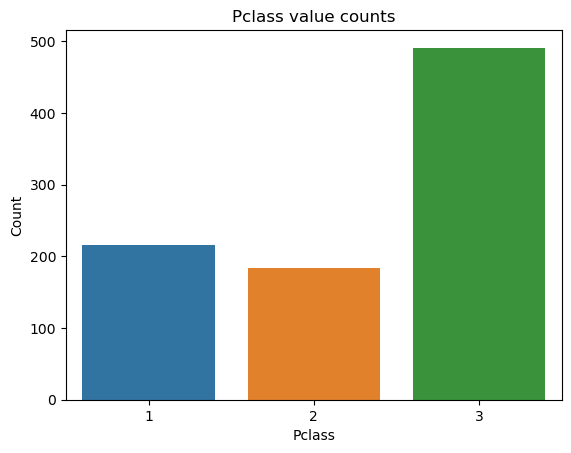

In [10]:
sns.countplot(data = df, x="Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Pclass value counts")

In [11]:
# 2. 생존자와 사망자 총 숫자 및 차트표시

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'unSurvived vs Survived')

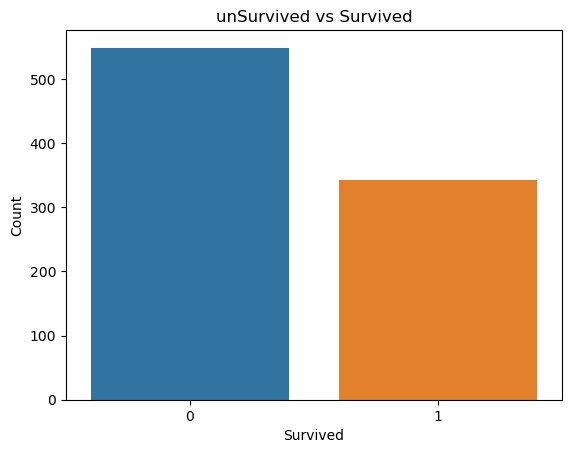

In [12]:
sns.countplot(data = df, x="Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("unSurvived vs Survived")

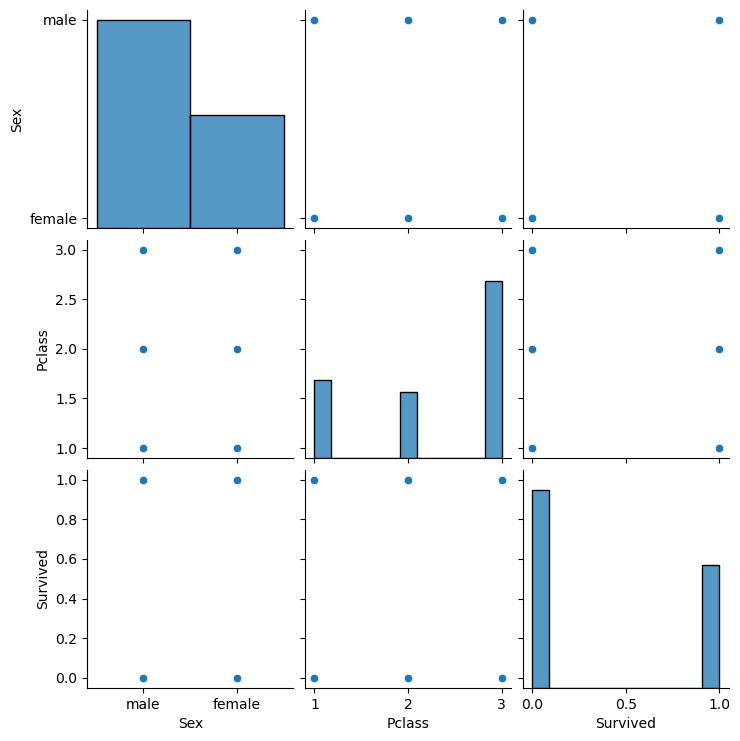

In [13]:
# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석

sns.pairplot(df,
             vars=['Sex', 'Pclass', 'Survived'])
plt.show()

In [14]:
df.drop(['PassengerId','Embarked','Name','Ticket','Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [15]:
#레이블 인코딩

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features = ['Sex']
for feature in features :
    df[feature] = le.fit_transform(df[feature])
    
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [16]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [23]:
df_data=df.drop('Survived', axis=1)

In [24]:
df_target = df['Survived']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, df_target,test_size=0.25,random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [27]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7085201793721974
[[131   8]
 [ 57  27]]


In [28]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7892376681614349
[[115  24]
 [ 23  61]]


In [29]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8071748878923767
[[118  21]
 [ 22  62]]


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.8385650224215246
[[126  13]
 [ 23  61]]


In [31]:
from sklearn.neighbors import KNeighborsClassifier
mymodel = KNeighborsClassifier(n_neighbors=3)
mymodel.fit(X_train, y_train)
prediction = mymodel.predict(X_test)
mymodel.score(X_test, y_test)

0.695067264573991

In [32]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.7892376681614349
[[117  22]
 [ 25  59]]
